In [750]:
import sys
sys.path.append("..")
from LeastSquare import LeastSquare as LS
from LinearRegression import LinearRegression as LR
import numpy as np
import BiasVarv2 as bv
import matplotlib.pyplot as plt
import random
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2"))
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 3})

In [781]:
def mean_square_err(a, b):
    return np.mean((a-b)**2)

In [751]:
n_res = 10000
num_sample = 10
min_x = -3
max_x = 3
x = np.linspace(min_x, max_x, n_res)
f = lambda x: x**2 + 0.25*x + 0.5
function_fx = 'f(x) = x**2 + 0.25*x + 0.5'

In [760]:
sample_x = np.random.choice(np.linspace(min_x, max_x, int(n_res/10)), num_sample)
noise = np.random.randn(num_sample)/1.25
y = f(sample_x) + noise

## $f(x) = x^2 +0.5$

### $f_{sample}(x) = x^2 +0.5 + noise$

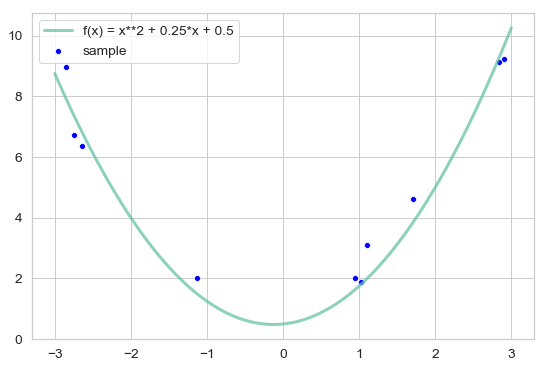

In [805]:
fig = plt.figure(figsize=(9, 6))
sns.lineplot(x, f(x), alpha=0.75, label=function_fx)
sns.scatterplot(sample_x, y, color='blue', label='sample')
plt.savefig('02-fx-vs-sample-fx.png', dpi=150)

In [762]:
degree = 5
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
# prepare sample x for polynomial [x, x**2, x**3, ...] 
sample_x_poly = polynomial_features.fit_transform(sample_x[:, np.newaxis])

In [763]:
model = LinearRegression()

In [764]:
model.fit(sample_x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [765]:
model.coef_.tolist()

[-0.3961975736319321,
 0.4254143008982577,
 0.5841821775652289,
 0.058276212222162796,
 -0.06464978082788542]

In [766]:
x_poly = polynomial_features.fit_transform(x[:, np.newaxis])
y_poly_pred = model.predict(x_poly)

[-3.5, 3.5, -2, 10]

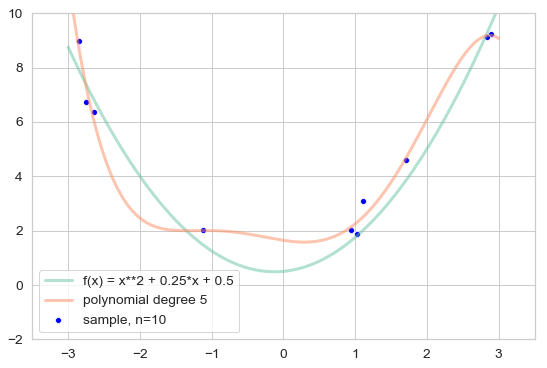

In [767]:
fig = plt.figure(figsize=(9, 6))
sns.lineplot(x, f(x), alpha=0.5, label=function_fx)
sns.scatterplot(sample_x, y, color='blue', label=f'sample, n={num_sample}')
sns.lineplot(x, y_poly_pred, alpha=0.5, label=f'polynomial degree {degree}')
plt.axis([-3.5, 3.5, -2, 10])

In [769]:
degree_list = np.arange(1, num_sample+1, 1)
degree_list = [1, 2, 3, 4, 5]

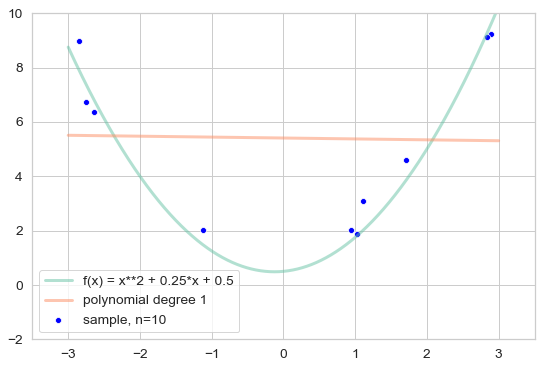

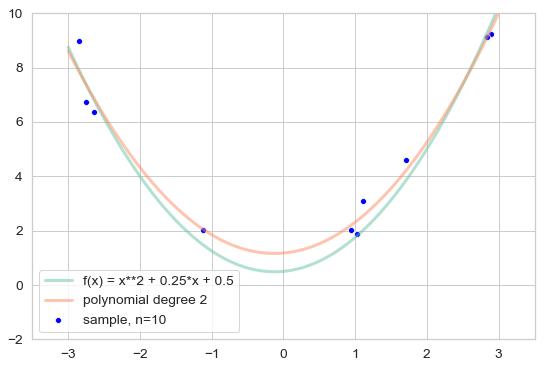

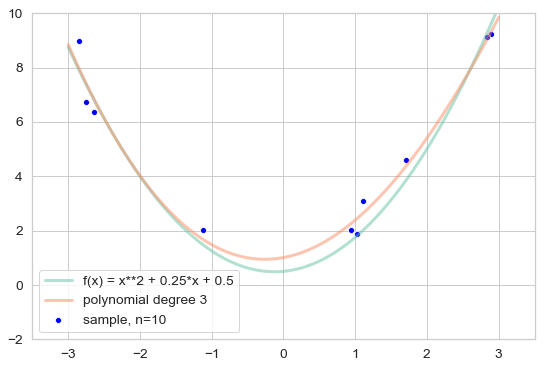

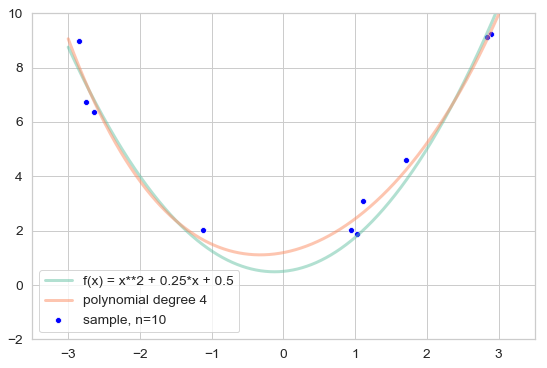

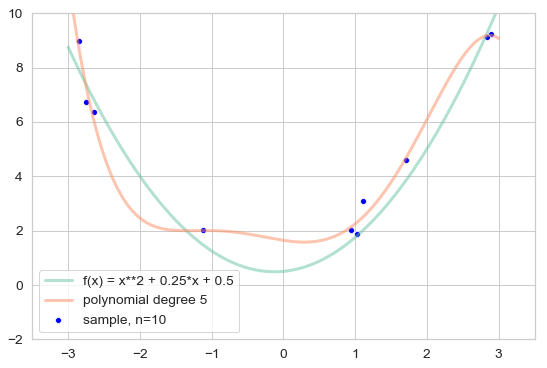

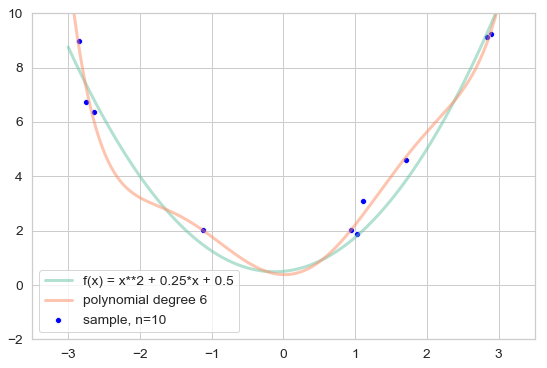

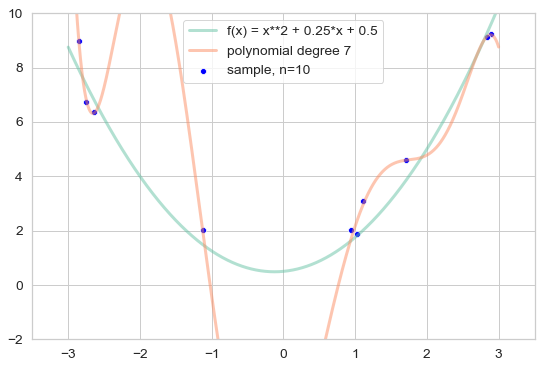

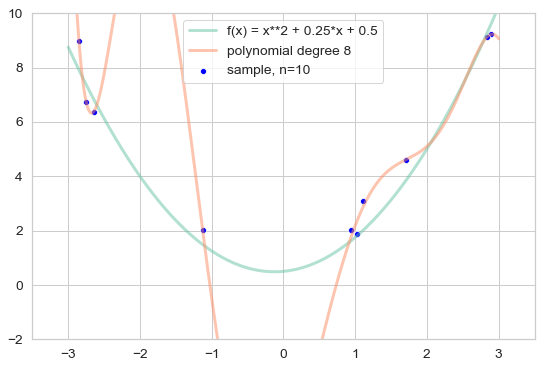

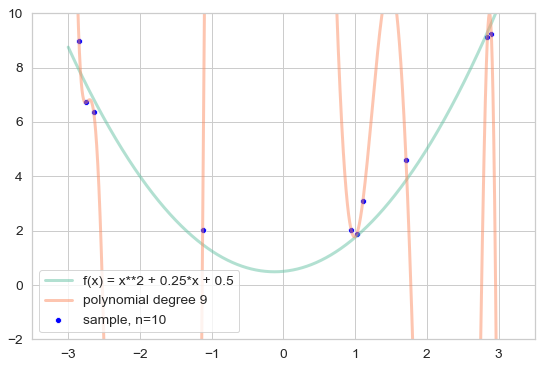

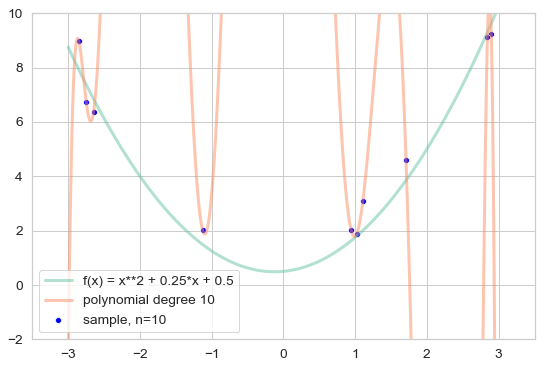

In [785]:
coef_list = []
intercept_list = []

in_sample_err = []
out_sample_err = []

for d in degree_list:
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    # prepare sample x for polynomial [x, x**2, x**3, ...] 
    sample_x_poly = polynomial_features.fit_transform(sample_x[:, np.newaxis])
    model = LinearRegression()
    model.fit(sample_x_poly, y)
    coef = np.round(model.coef_, 3)
    intercept = np.round(model.intercept_, 3)
    coef_list.append(coef)
    intercept_list.append(intercept)
    x_poly = polynomial_features.fit_transform(x[:, np.newaxis])
    y_poly_pred = model.predict(x_poly)
    e_in = mean_square_err(model.predict(sample_x_poly), y)
    e_out = mean_square_err(y_poly_pred, f(x))
    in_sample_err.append(e_in)
    out_sample_err.append(e_out)
    fig = plt.figure(figsize=(9, 6))
    sns.lineplot(x, f(x), alpha=0.5, label=function_fx)
    sns.scatterplot(sample_x, y, color='blue', label=f'sample, n={num_sample}')
    sns.lineplot(x, y_poly_pred, alpha=0.5, label=f'polynomial degree {d}')
    plt.axis([-3.5, 3.5, -2, 10])
    plt.savefig(f'02-overfit-plot/02-overfit-degree-{d}.png', dpi=150)

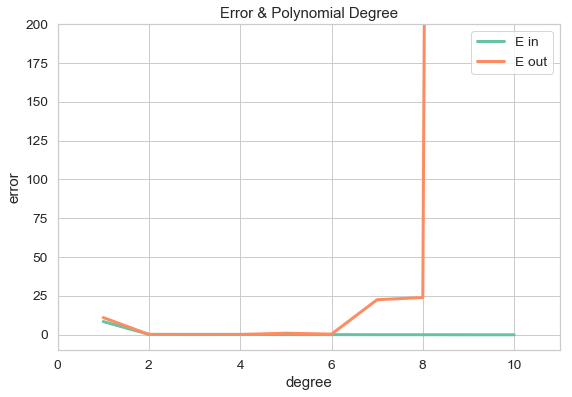

In [804]:
fig = plt.figure(figsize=(9, 6))
sns.lineplot(degree_list, in_sample_err, label='E in')
sns.lineplot(degree_list, out_sample_err, label='E out')
plt.xlabel('degree')
plt.ylabel('error')
plt.title('Error & Polynomial Degree')
plt.axis([0, 11, -10, 200])
plt.savefig(f'02-overfit-plot/02-error-degree.png', dpi=150)